In [1]:
# 1. IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:
# 2. LOAD DATA
# Update the path since your CSV is in: out/data/listings.csv
import pandas as pd

try:
    listings_df = pd.read_csv('data/listings.csv')
    print(f"Listings data loaded: {listings_df.shape[0]} rows, {listings_df.shape[1]} columns")
    
except FileNotFoundError:
    print("Error: Files not found. Please check your file paths.")

# Peek at the data
listings_df.head(3)


Listings data loaded: 11481 rows, 106 columns


C:\Users\ralma\AppData\Local\Temp\ipykernel_24468\836861012.py:6: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv('data/listings.csv')


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",none,Glockenbachviertel area has the hippest restau...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.37
1,97945,https://www.airbnb.com/rooms/97945,20191125094942,2019-11-25,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",none,We are living in a outskirt of Munich its call...,...,f,f,flexible,f,f,1,1,0,0,1.32
2,114695,https://www.airbnb.com/rooms/114695,20191125094942,2019-11-25,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.52


In [8]:
# 3. PREPROCESSING & CLEANING

# Helper function to clean currency strings
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

# Convert price columns
target_cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']

for col in target_cols:
    if col in listings_df.columns:
        listings_df[col] = listings_df[col].apply(clean_currency)

print("Price columns converted to float.")

# Check for missing values in critical columns
print("\nMissing values in key columns:")
print(listings_df[['price', 'bedrooms', 'bathrooms', 'review_scores_rating']].isnull().sum())

# Simple Drop for rows where target 'price' is missing (if any)
listings_df = listings_df.dropna(subset=['price'])

Price columns converted to float.

Missing values in key columns:
price                      0
bedrooms                  30
bathrooms                 21
review_scores_rating    2734
dtype: int64


count    11481.000000
mean       116.336469
std        168.078321
min          8.000000
25%         55.000000
50%         82.000000
75%        130.000000
max       9000.000000
Name: price, dtype: float64


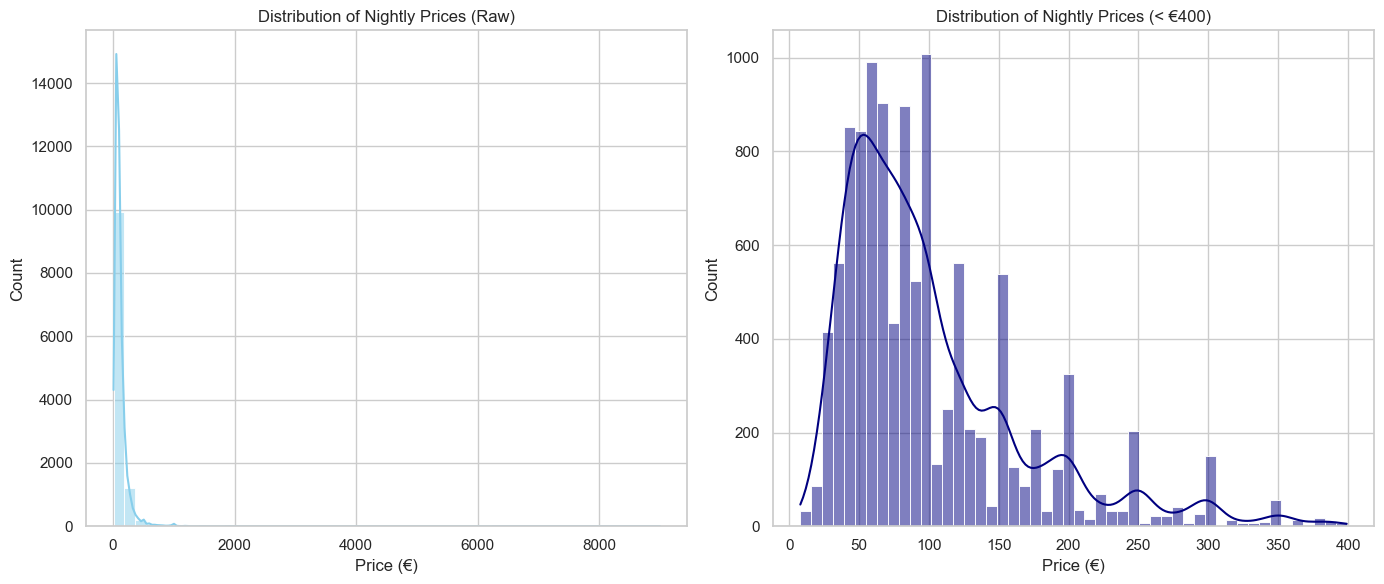

In [9]:
# 4. EXPLORATORY ANALYSIS: PRICE DISTRIBUTION

# Basic statistics
print(listings_df['price'].describe())

# Plot Distribution
plt.figure(figsize=(14, 6))

# Subplot 1: Full distribution
plt.subplot(1, 2, 1)
sns.histplot(listings_df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Nightly Prices (Raw)')
plt.xlabel('Price (€)')

# Subplot 2: Filtered distribution (Removing extreme luxury outliers for better view)
# Let's look at prices under 400 Euros for the visualization
plt.subplot(1, 2, 2)
sns.histplot(listings_df[listings_df['price'] < 400]['price'], bins=50, kde=True, color='navy')
plt.title('Distribution of Nightly Prices (< €400)')
plt.xlabel('Price (€)')

plt.tight_layout()
plt.show()

C:\Users\ralma\AppData\Local\Temp\ipykernel_24468\2291473885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=listings_df, x='room_type', palette='viridis', ax=axes[0])
C:\Users\ralma\AppData\Local\Temp\ipykernel_24468\2291473885.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=listings_df[listings_df['price'] < 400], x='room_type', y='price', palette='viridis', ax=axes[1])


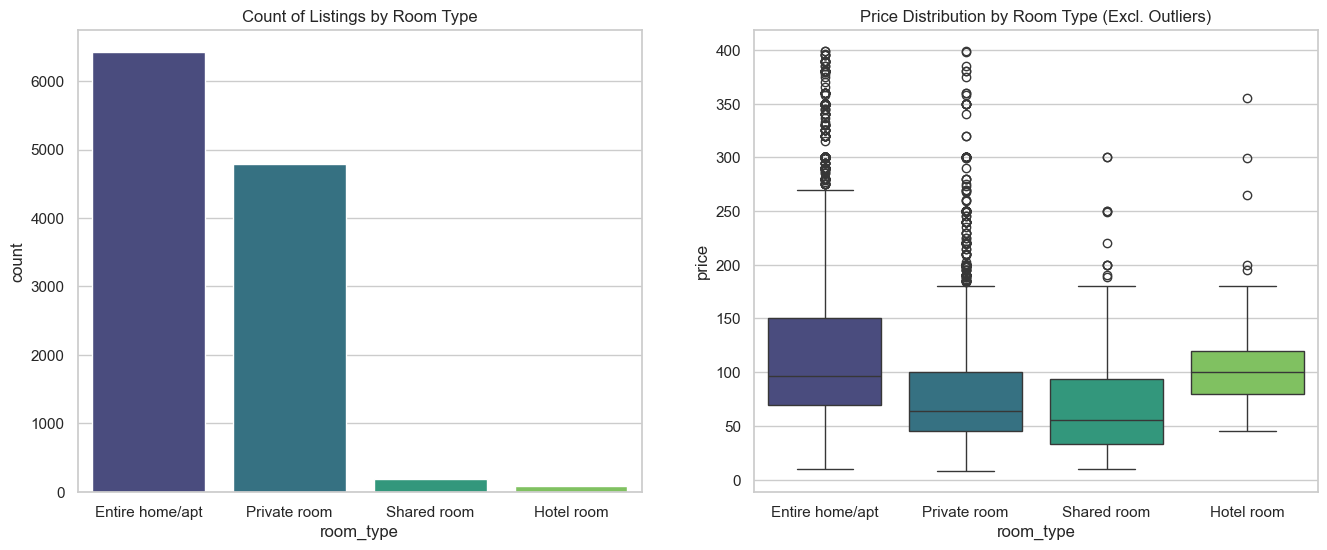

C:\Users\ralma\AppData\Local\Temp\ipykernel_24468\2291473885.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=listings_df[listings_df['price'] < 500],


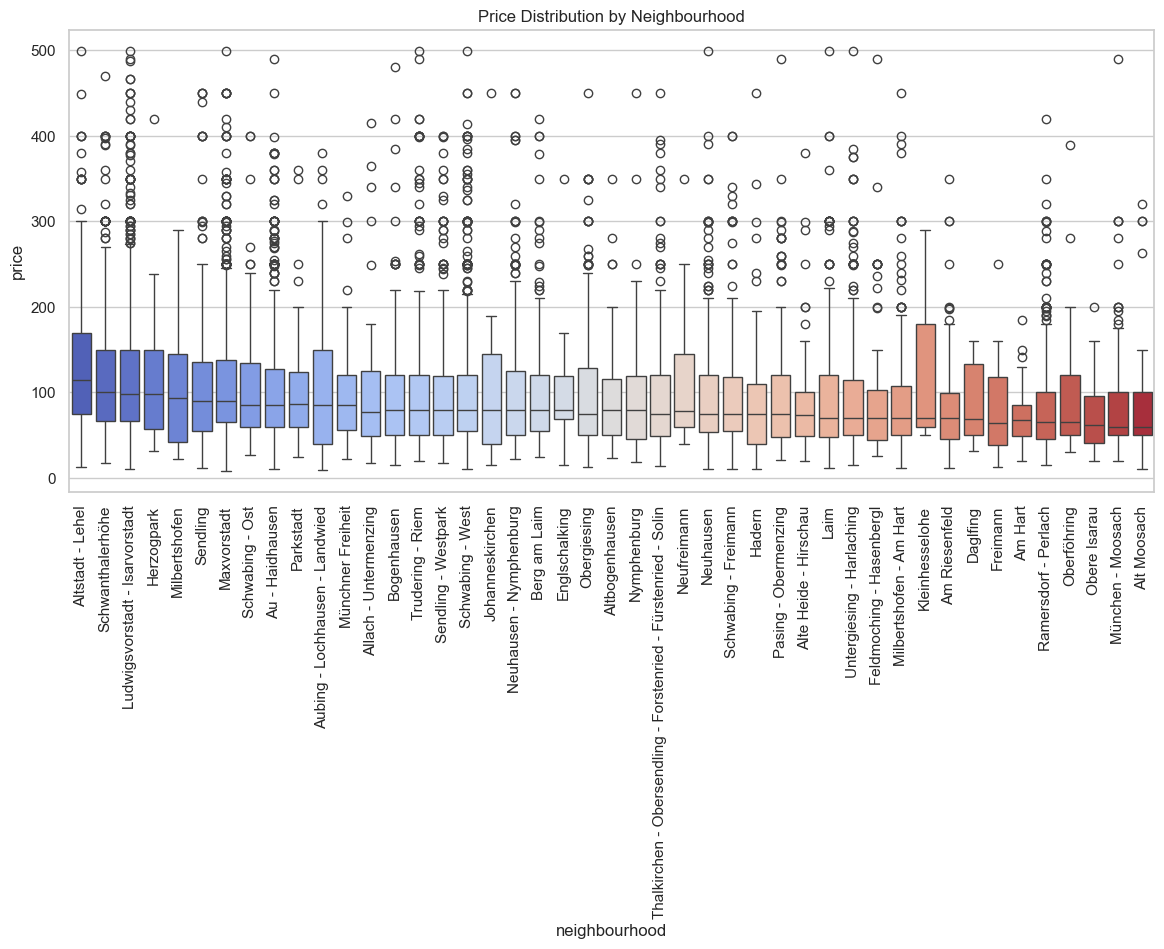

In [10]:
# 5. CATEGORICAL ANALYSIS

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Room Type Count
sns.countplot(data=listings_df, x='room_type', palette='viridis', ax=axes[0])
axes[0].set_title('Count of Listings by Room Type')

# Price by Room Type
sns.boxplot(data=listings_df[listings_df['price'] < 400], x='room_type', y='price', palette='viridis', ax=axes[1])
axes[1].set_title('Price Distribution by Room Type (Excl. Outliers)')

plt.show()

# Neighbourhood Analysis
plt.figure(figsize=(14, 6))
# Calculate median price per neighbourhood and sort
neighbourhood_order = listings_df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).index

sns.boxplot(data=listings_df[listings_df['price'] < 500], 
            x='neighbourhood', y='price', order=neighbourhood_order, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Price Distribution by Neighbourhood')
plt.show()

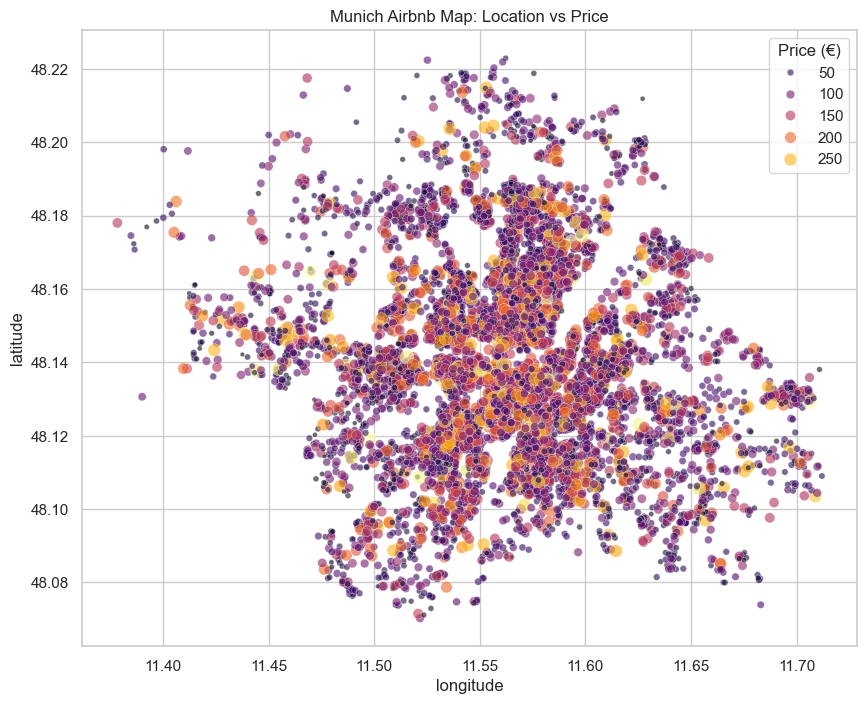

In [11]:
# 6. GEOGRAPHIC PLOTTING

plt.figure(figsize=(10, 8))

# Scatter plot of listings based on Latitude/Longitude
# Color by Price (capped at 300 to keep the color scale useful)
sns.scatterplot(
    data=listings_df[listings_df['price'] < 300], 
    x='longitude', y='latitude', 
    hue='price', palette='inferno', size='price', sizes=(10, 100), alpha=0.6
)

plt.title('Munich Airbnb Map: Location vs Price')
plt.legend(title='Price (€)')
plt.show()

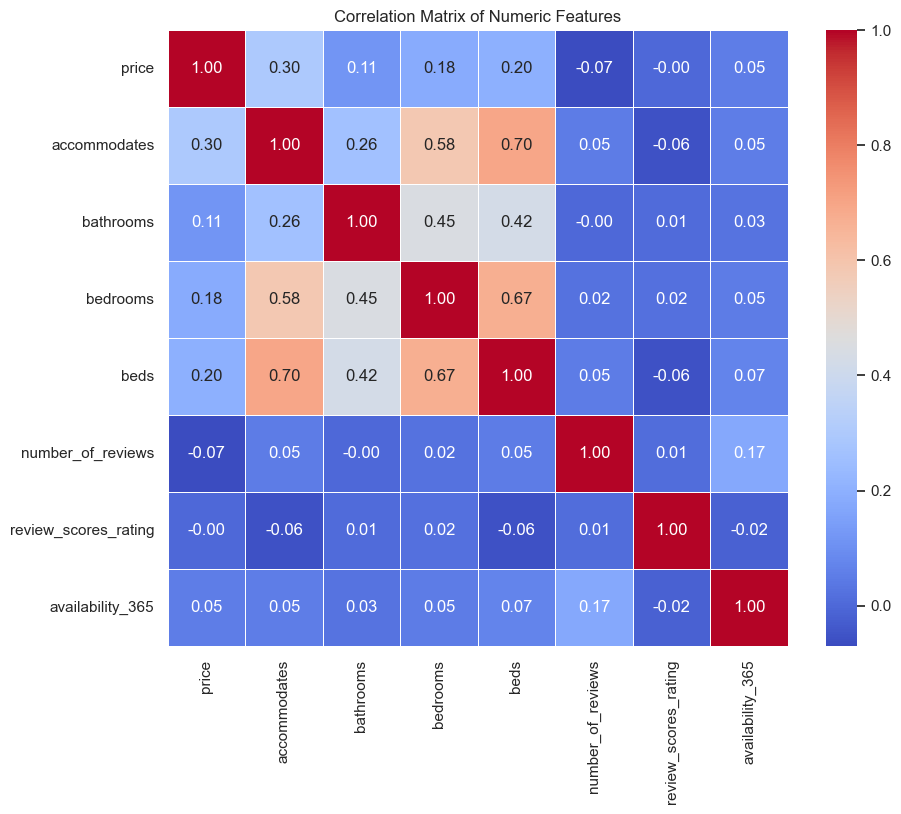

In [12]:
# 7. CORRELATION HEATMAP

# Select numeric columns relevant to Task 1
numeric_cols = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                'number_of_reviews', 'review_scores_rating', 'availability_365']

corr_matrix = listings_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [13]:
# --- STEP 1: FEATURE ENGINEERING (Listings) ---

# 1. Host Tenure (Host Since -> Days active)
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'])
ref_date = pd.to_datetime('2019-11-20') # Approximate date of dataset snapshot
listings_df['host_tenure_days'] = (ref_date - listings_df['host_since']).dt.days

# 2. Amenities Count (Text processing)
# Amenities usually come as "{TV, Wifi, Kitchen}". We count the items.
listings_df['amenities_count'] = listings_df['amenities'].apply(lambda x: len(x.replace('{','').replace('}','').split(',')))

# 3. Handle Categorical Boolean (t/f)
bool_cols = ['host_is_superhost', 'host_identity_verified', 'instant_bookable']
for col in bool_cols:
    if col in listings_df.columns:
        listings_df[col] = listings_df[col].map({'t': 1, 'f': 0}).fillna(0)

# 4. Fill Missing Values for Numerical Features
# We use median for robustness against outliers
fill_cols = ['bedrooms', 'bathrooms', 'beds', 'review_scores_rating', 'host_tenure_days']
for col in fill_cols:
    listings_df[col] = listings_df[col].fillna(listings_df[col].median())

print("Feature Engineering complete.")

Feature Engineering complete.


--- Linear Regression Performance ---
MAE:  €54.86
RMSE: €145.40
R2:   0.108

--- Random Forest Performance ---
MAE:  €52.23
RMSE: €140.35
R2:   0.169



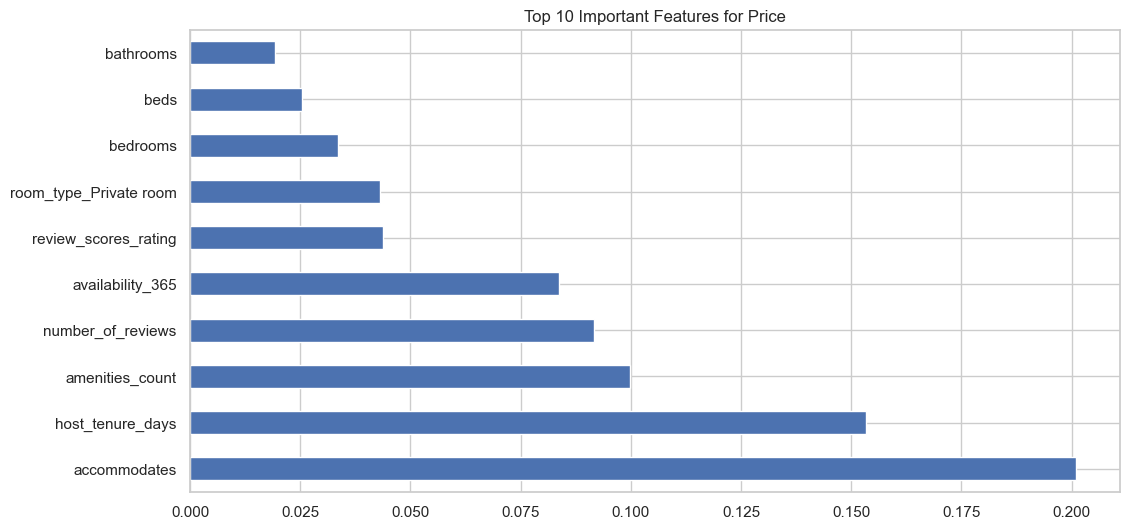

In [14]:
# --- STEP 2: TASK 1 - PRICE PREDICTION ---

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# A. Select Features (As per Proposal Slide 2)
features_numeric = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 
                    'number_of_reviews', 'review_scores_rating', 
                    'availability_365', 'host_tenure_days', 'amenities_count']
features_cat = ['room_type', 'neighbourhood', 'host_is_superhost']

# B. Prepare X and y
# One-Hot Encoding for categorical variables (Room Type, Neighbourhood)
X = listings_df[features_numeric + features_cat]
X = pd.get_dummies(X, columns=['room_type', 'neighbourhood'], drop_first=True)
y = listings_df['price']

# Log-transform price (optional but recommended for skewed money data)
# We will train on log(price) but evaluate on real price to make errors interpretable
import numpy as np
y_log = np.log1p(y) 

# C. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# D. Train Models
# Model 1: Linear Regression (Baseline)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model 2: Random Forest (Non-linear)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# E. Evaluation Function
def evaluate_model(model, X_t, y_t, name):
    pred_log = model.predict(X_t)
    pred_real = np.expm1(pred_log) # Reverse log transform
    y_real = np.expm1(y_t)
    
    mae = mean_absolute_error(y_real, pred_real)
    rmse = np.sqrt(mean_squared_error(y_real, pred_real))
    r2 = r2_score(y_real, pred_real)
    
    print(f"--- {name} Performance ---")
    print(f"MAE:  €{mae:.2f}")
    print(f"RMSE: €{rmse:.2f}")
    print(f"R2:   {r2:.3f}\n")

# Run Evaluation
evaluate_model(lr, X_test, y_test, "Linear Regression")
evaluate_model(rf, X_test, y_test, "Random Forest")

# F. Feature Importance (for Random Forest)
import pandas as pd
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh', title='Top 10 Important Features for Price')
plt.show()

Training Classifier... (this may take a moment)

--- Occupancy Prediction Results ---
              precision    recall  f1-score   support

           0       0.93      0.03      0.05     15933
           1       0.81      1.00      0.90     67879

    accuracy                           0.81     83812
   macro avg       0.87      0.51      0.47     83812
weighted avg       0.84      0.81      0.74     83812

ROC-AUC Score: 0.719


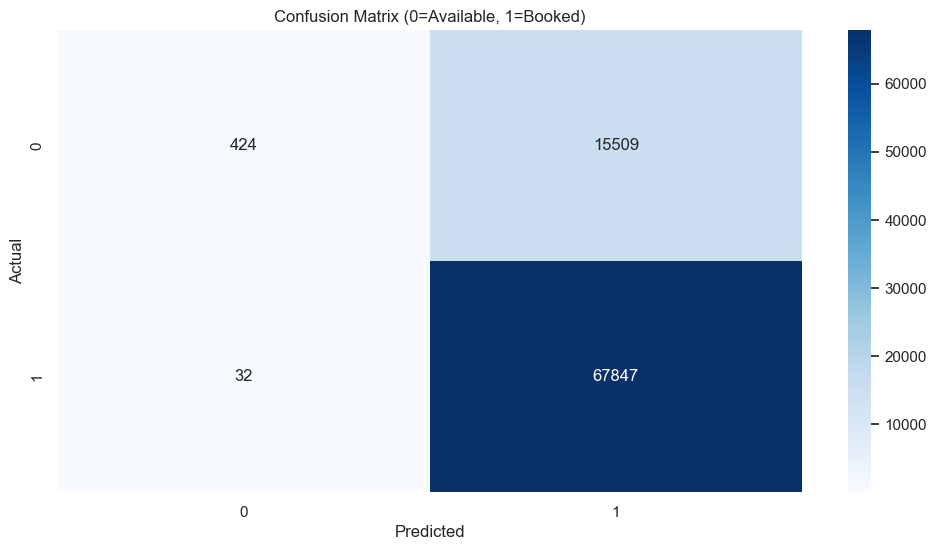

In [16]:
# --- STEP 3: TASK 2 - OCCUPANCY PREDICTION ---

# A. Load and Sample Calendar Data
# (Assuming calendar.csv is in the same folder)
calendar_df = pd.read_csv('data/calendar.csv') 

# Clean Currency in Calendar (Price varies by date)
calendar_df['price'] = calendar_df['price'].apply(clean_currency)

# Convert 'available' to binary Target (f=Booked=1, t=Available=0)
# Note: 'f' means NOT available, which usually implies booked.
calendar_df['is_booked'] = calendar_df['available'].map({'f': 1, 't': 0})

# Convert Date
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

# OPTIMIZATION: Take a random sample to speed up training (e.g., 10% of data)
# If your computer is powerful, you can increase frac=0.1 to 0.5 or 1.0
calendar_sample = calendar_df.sample(frac=0.1, random_state=42)

# B. Feature Engineering (Temporal)
calendar_sample['month'] = calendar_sample['date'].dt.month
calendar_sample['day_of_week'] = calendar_sample['date'].dt.dayofweek # 0=Mon, 6=Sun

# C. Merge with Listing Features
# We only need a subset of listing features to avoid massive memory usage
listing_subset = listings_df[['id', 'room_type', 'neighbourhood', 'review_scores_rating', 'host_is_superhost']]
merged_df = calendar_sample.merge(listing_subset, left_on='listing_id', right_on='id', how='inner')

# D. Prepare Classification Data
class_features = ['month', 'day_of_week', 'price', 'review_scores_rating', 'host_is_superhost']
# Encode categorical columns
X_class = pd.get_dummies(merged_df[class_features + ['room_type', 'neighbourhood']], columns=['room_type', 'neighbourhood'], drop_first=True)

# Fill Missing in merged data
X_class = X_class.fillna(0)

y_class = merged_df['is_booked']

# E. Split Data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# F. Train Models
print("Training Classifier... (this may take a moment)")
# Model: Random Forest Classifier
clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
clf.fit(X_train_c, y_train_c)

# G. Evaluation
y_pred_c = clf.predict(X_test_c)
y_prob_c = clf.predict_proba(X_test_c)[:, 1]

print("\n--- Occupancy Prediction Results ---")
print(classification_report(y_test_c, y_pred_c))
print(f"ROC-AUC Score: {roc_auc_score(y_test_c, y_prob_c):.3f}")

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (0=Available, 1=Booked)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
# --- STEP 4: IMPROVING MODEL PERFORMANCE (ITERATION) ---

print("--- STARTING ITERATION 2: OPTIMIZATION ---")

# ==========================================
# FIX TASK 1: REMOVE OUTLIERS (PRICE)
# ==========================================

# 1. Filter Data: Keep prices between €20 and €300 (covers ~95% of listings)
df_clean = listings_df[(listings_df['price'] > 20) & (listings_df['price'] < 300)].copy()

print(f"Original Listings: {len(listings_df)}, Cleaned Listings: {len(df_clean)}")

# 2. Re-Prepare Data
X_opt = df_clean[features_numeric + features_cat]
X_opt = pd.get_dummies(X_opt, columns=['room_type', 'neighbourhood'], drop_first=True)
y_opt = df_clean['price'] # We try predicting raw price now, as range is smaller

# 3. Train Random Forest again
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.2, random_state=42)

rf_opt = RandomForestRegressor(n_estimators=100, random_state=42)
rf_opt.fit(X_train_opt, y_train_opt)

# 4. Evaluate
y_pred_opt = rf_opt.predict(X_test_opt)
mae_opt = mean_absolute_error(y_test_opt, y_pred_opt)
r2_opt = r2_score(y_test_opt, y_pred_opt)

print(f"\n--- Improved Price Prediction (Random Forest) ---")
print(f"MAE:  €{mae_opt:.2f}")
print(f"R2:   {r2_opt:.3f}")


# ==========================================
# FIX TASK 2: HANDLE IMBALANCE (OCCUPANCY)
# ==========================================

# We use the same split from before (X_train_c, y_train_c), 
# but we change the MODEL parameters.

print("\n--- Training Balanced Classifier... ---")

# 1. Use 'class_weight="balanced"'
# This tells the model: "Pay more attention to the minority class (Available)"
clf_balanced = RandomForestClassifier(
    n_estimators=100, 
    max_depth=15, 
    class_weight='balanced', # <--- THIS IS THE KEY FIX
    random_state=42
)
clf_balanced.fit(X_train_c, y_train_c)

# 2. Evaluate
y_pred_bal = clf_balanced.predict(X_test_c)

print("\n--- Improved Occupancy Prediction Results ---")
print(classification_report(y_test_c, y_pred_bal))

# Check the Recall for Class 0 (Available) - It should be much higher now!

--- STARTING ITERATION 2: OPTIMIZATION ---
Original Listings: 11481, Cleaned Listings: 10824

--- Improved Price Prediction (Random Forest) ---
MAE:  €35.65
R2:   0.223

--- Training Balanced Classifier... ---

--- Improved Occupancy Prediction Results ---
              precision    recall  f1-score   support

           0       0.39      0.64      0.49     15933
           1       0.90      0.77      0.83     67879

    accuracy                           0.74     83812
   macro avg       0.65      0.70      0.66     83812
weighted avg       0.80      0.74      0.76     83812



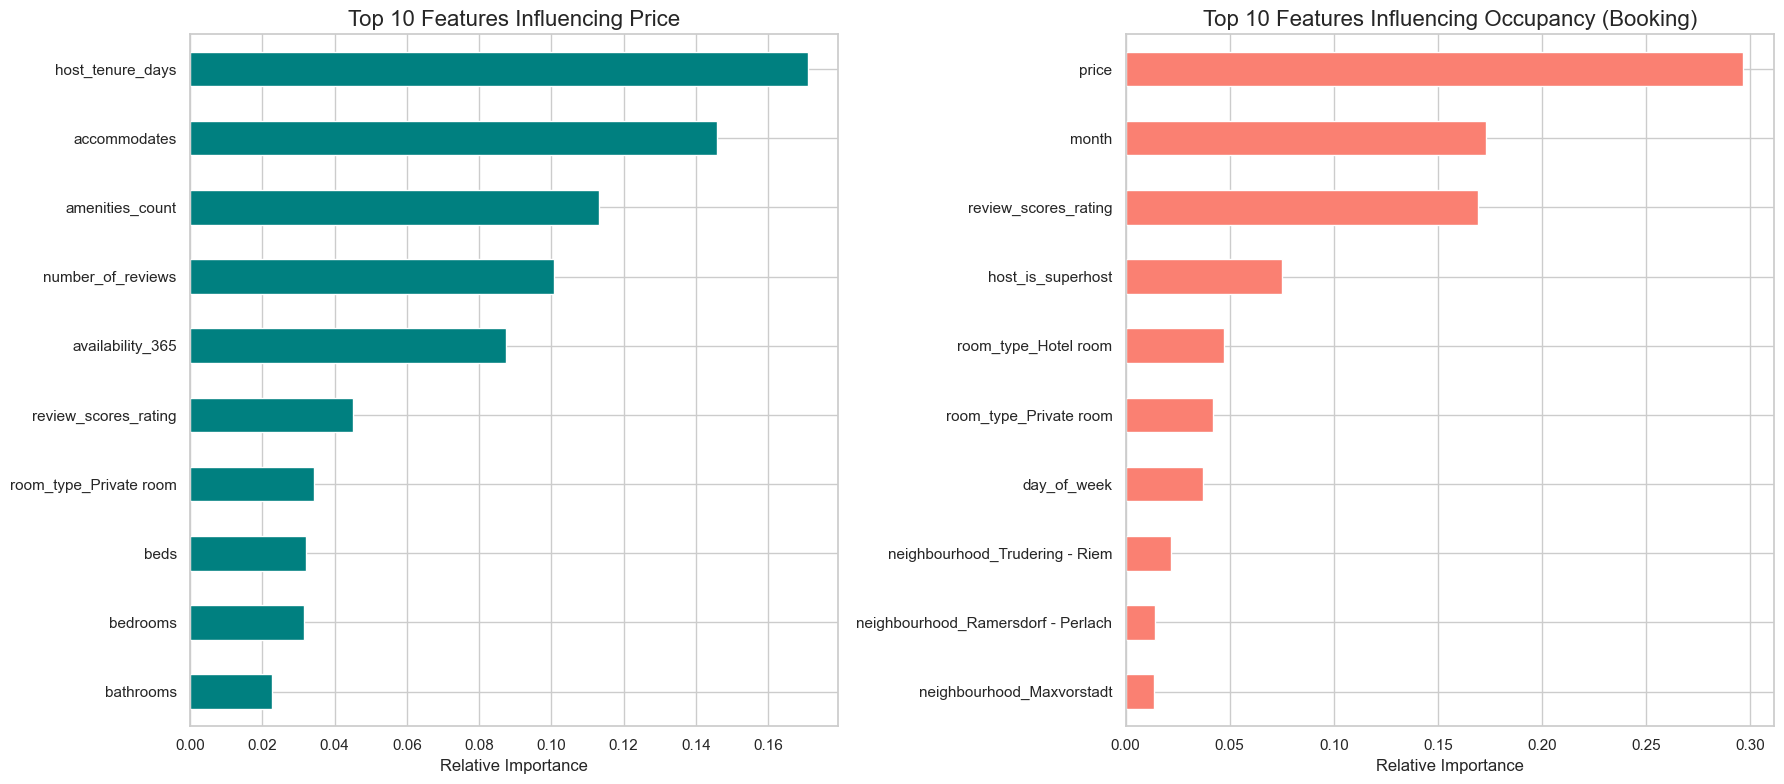

In [18]:
# --- STEP 5: FINAL INSIGHTS & VISUALIZATION ---

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting up the plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# --- PLOT 1: What drives Price? (Regression Importance) ---
# Get importance from the optimized Random Forest (rf_opt)
importance_reg = pd.Series(rf_opt.feature_importances_, index=X_opt.columns)
# Sort and take top 10
top_reg = importance_reg.nlargest(10).sort_values()

top_reg.plot(kind='barh', color='teal', ax=axes[0])
axes[0].set_title('Top 10 Features Influencing Price', fontsize=16)
axes[0].set_xlabel('Relative Importance')

# --- PLOT 2: What drives Occupancy? (Classification Importance) ---
# Get importance from the Balanced Classifier (clf_balanced)
importance_clf = pd.Series(clf_balanced.feature_importances_, index=X_train_c.columns)
# Sort and take top 10
top_clf = importance_clf.nlargest(10).sort_values()

top_clf.plot(kind='barh', color='salmon', ax=axes[1])
axes[1].set_title('Top 10 Features Influencing Occupancy (Booking)', fontsize=16)
axes[1].set_xlabel('Relative Importance')

plt.tight_layout()
plt.show()

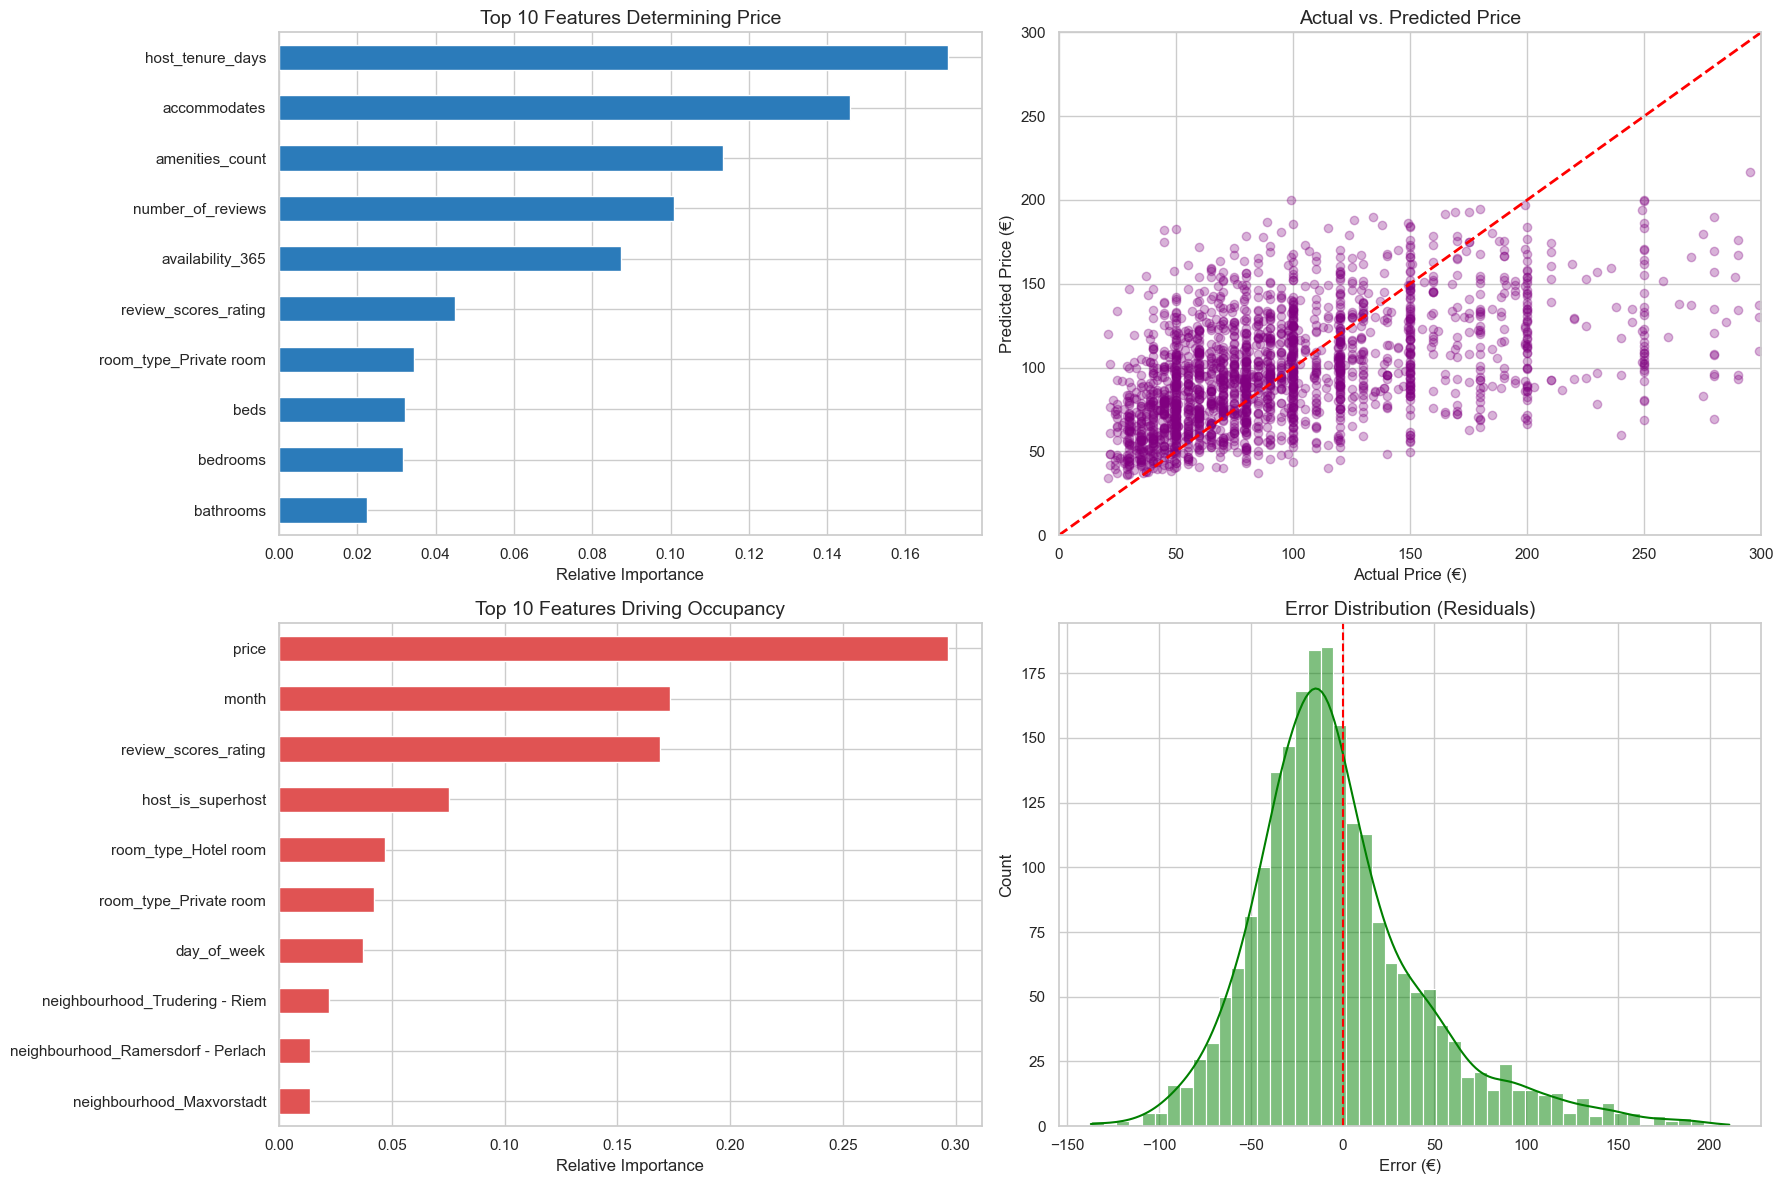

In [19]:
# --- STEP 5: VISUALIZATION & DIAGNOSTICS ---

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# --- CHART 1: Feature Importance (Price) ---
plt.subplot(2, 2, 1)
# Extract importance from the Optimized Random Forest
importance = pd.Series(rf_opt.feature_importances_, index=X_opt.columns)
# Plot top 10
importance.nlargest(10).sort_values().plot(kind='barh', color='#2b7bba')
plt.title('Top 10 Features Determining Price', fontsize=14)
plt.xlabel('Relative Importance')

# --- CHART 2: Prediction vs Actual (Price) ---
plt.subplot(2, 2, 2)
# Scatter plot of Actual vs Predicted
plt.scatter(y_test_opt, y_pred_opt, alpha=0.3, color='purple')
# Perfect prediction line
plt.plot([0, 300], [0, 300], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Price', fontsize=14)
plt.xlabel('Actual Price (€)')
plt.ylabel('Predicted Price (€)')
plt.xlim(0, 300)
plt.ylim(0, 300)

# --- CHART 3: Feature Importance (Occupancy) ---
plt.subplot(2, 2, 3)
# Extract importance from Balanced Classifier
importance_clf = pd.Series(clf_balanced.feature_importances_, index=X_train_c.columns)
importance_clf.nlargest(10).sort_values().plot(kind='barh', color='#e05353')
plt.title('Top 10 Features Driving Occupancy', fontsize=14)
plt.xlabel('Relative Importance')

# --- CHART 4: Residual Distribution ---
plt.subplot(2, 2, 4)
# Residuals = Actual - Predicted
residuals = y_test_opt - y_pred_opt
sns.histplot(residuals, bins=50, kde=True, color='green')
plt.title('Error Distribution (Residuals)', fontsize=14)
plt.xlabel('Error (€)')
plt.axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [22]:
import sys
!{sys.executable} -m pip install geopy


  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.1-py3-none-any.whl.metadata (1.6 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.1-py3-none-any.whl (40 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\ralma\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [24]:
# --- STEP 1: ADVANCED DATA CLEANING & FEATURE ENGINEERING ---

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

import geopy.distance # You might need: pip install geopy

# Reload raw data to start fresh
listings_df = pd.read_csv('data/listings.csv')

# 1. CLEAN PRICE (Reusing our function)
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

listings_df['price'] = listings_df['price'].apply(clean_currency)

# 2. FILTERING TARGET VARIABLE (Outliers via IQR Method)
# This is more scientific than just picking numbers like 20 and 300
Q1 = listings_df['price'].quantile(0.25)
Q3 = listings_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR Method Bounds: €{lower_bound:.2f} to €{upper_bound:.2f}")

# Filter
df_adv = listings_df[(listings_df['price'] >= 20) & (listings_df['price'] <= upper_bound)].copy()
print(f"Rows kept: {len(df_adv)} (dropped {len(listings_df) - len(df_adv)})")

# 3. ADVANCED IMPUTATION (Handling Missing Values)
# Instead of dropping, we fill.
# For 'bathrooms', 'bedrooms', 'beds': Fill with Median (integer-like)
# For 'review_scores': Fill with Mean, but add a 'was_missing' flag
impute_median_cols = ['bathrooms', 'bedrooms', 'beds']
for col in impute_median_cols:
    df_adv[col] = df_adv[col].fillna(df_adv[col].median())

# Flag missing reviews (important signal: missing review often means new listing)
df_adv['reviews_missing'] = df_adv['review_scores_rating'].isnull().astype(int)
df_adv['review_scores_rating'] = df_adv['review_scores_rating'].fillna(df_adv['review_scores_rating'].mean())

# 4. FEATURE ENGINEERING: GEOGRAPHY
# Calculate distance to Munich Marienplatz (City Center)
# Marienplatz coords: 48.137154, 11.576124
marienplatz_coords = (48.137154, 11.576124)

def calculate_distance(row):
    coords_1 = (row['latitude'], row['longitude'])
    return geopy.distance.geodesic(marienplatz_coords, coords_1).km

# This might take a few seconds
df_adv['dist_center_km'] = df_adv.apply(calculate_distance, axis=1)

# 5. FEATURE ENGINEERING: AMENITIES
# Let's count specific high-value amenities
df_adv['has_wifi'] = df_adv['amenities'].str.contains('Wifi', case=False).astype(int)
df_adv['has_kitchen'] = df_adv['amenities'].str.contains('Kitchen', case=False).astype(int)
df_adv['total_amenities'] = df_adv['amenities'].apply(lambda x: len(x.split(',')))

# 6. FEATURE ENGINEERING: HOST
df_adv['host_since'] = pd.to_datetime(df_adv['host_since'])
df_adv['host_years'] = (pd.to_datetime('2019-11-20') - df_adv['host_since']).dt.days / 365
df_adv['host_years'] = df_adv['host_years'].fillna(0)

print("Advanced cleaning and engineering complete.")

C:\Users\ralma\AppData\Local\Temp\ipykernel_24468\2739085166.py:10: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv('data/listings.csv')


IQR Method Bounds: €-57.50 to €242.50
Rows kept: 10499 (dropped 982)
Advanced cleaning and engineering complete.


Starting Cross-Validation (5 Folds)...
Lasso Regression: Mean MAE = €33.51 (Std: 1.67)
Random Forest: Mean MAE = €32.91 (Std: 1.82)
XGBoost: Mean MAE = €33.85 (Std: 1.62)


C:\Users\ralma\AppData\Local\Temp\ipykernel_24468\4228235893.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


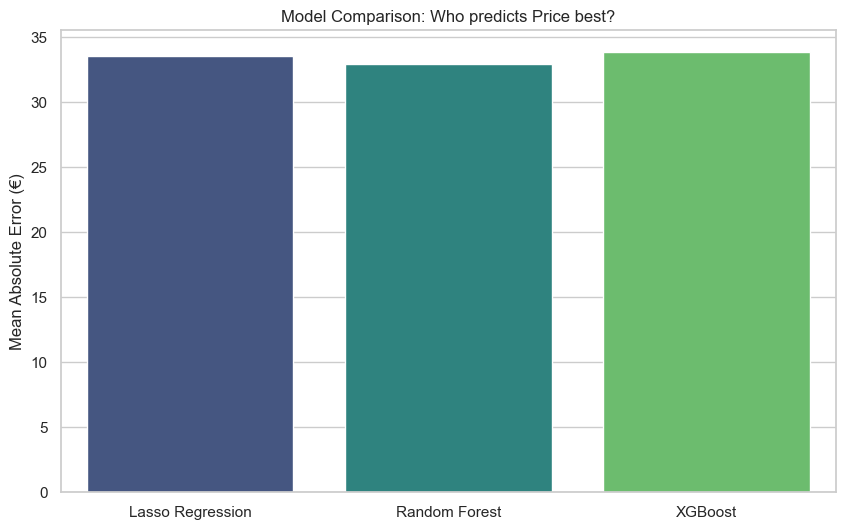

In [25]:
# --- STEP 2: MODEL COMPARISON WITH CROSS-VALIDATION ---

from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb # pip install xgboost

# 1. DEFINE PREPROCESSING PIPELINE
# We separate numeric and categorical processing
numeric_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 
                    'number_of_reviews', 'review_scores_rating', 
                    'dist_center_km', 'total_amenities', 'host_years']

categorical_features = ['room_type', 'neighbourhood', 'has_wifi', 'has_kitchen', 'reviews_missing']

# Pipeline: Scale numbers, Encode categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 2. DEFINE MODELS
models = {
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# 3. RUN CROSS-VALIDATION
# We use 5-Fold CV. This splits the data 5 times to check stability.
X = df_adv[numeric_features + categorical_features]
y = df_adv['price']

results = {}

print("Starting Cross-Validation (5 Folds)...")
for name, model in models.items():
    # Create full pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
    
    # Calculate Negative MAE (Scikit-learn maximizes score, so errors are negative)
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_absolute_error')
    
    # Convert to positive MAE
    mae_scores = -cv_scores
    results[name] = mae_scores.mean()
    print(f"{name}: Mean MAE = €{mae_scores.mean():.2f} (Std: {mae_scores.std():.2f})")

# 4. PLOT COMPARISON
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.ylabel('Mean Absolute Error (€)')
plt.title('Model Comparison: Who predicts Price best?')
plt.show()

In [26]:
# --- STEP 3: HYPERPARAMETER TUNING (Grid Search) ---
from sklearn.model_selection import GridSearchCV

# Let's say XGBoost was the best. Let's tune it.
# We define a "Grid" of settings to try.
param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__n_estimators': [100, 200]
}

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))])

print("Starting Grid Search... this finds the optimal settings.")
search = GridSearchCV(xgb_pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
search.fit(X, y)

print("\nBest Parameters found:", search.best_params_)
print(f"Best MAE after Tuning: €{-search.best_score_:.2f}")

# Save the best model
best_model = search.best_estimator_

Starting Grid Search... this finds the optimal settings.
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best Parameters found: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Best MAE after Tuning: €32.58


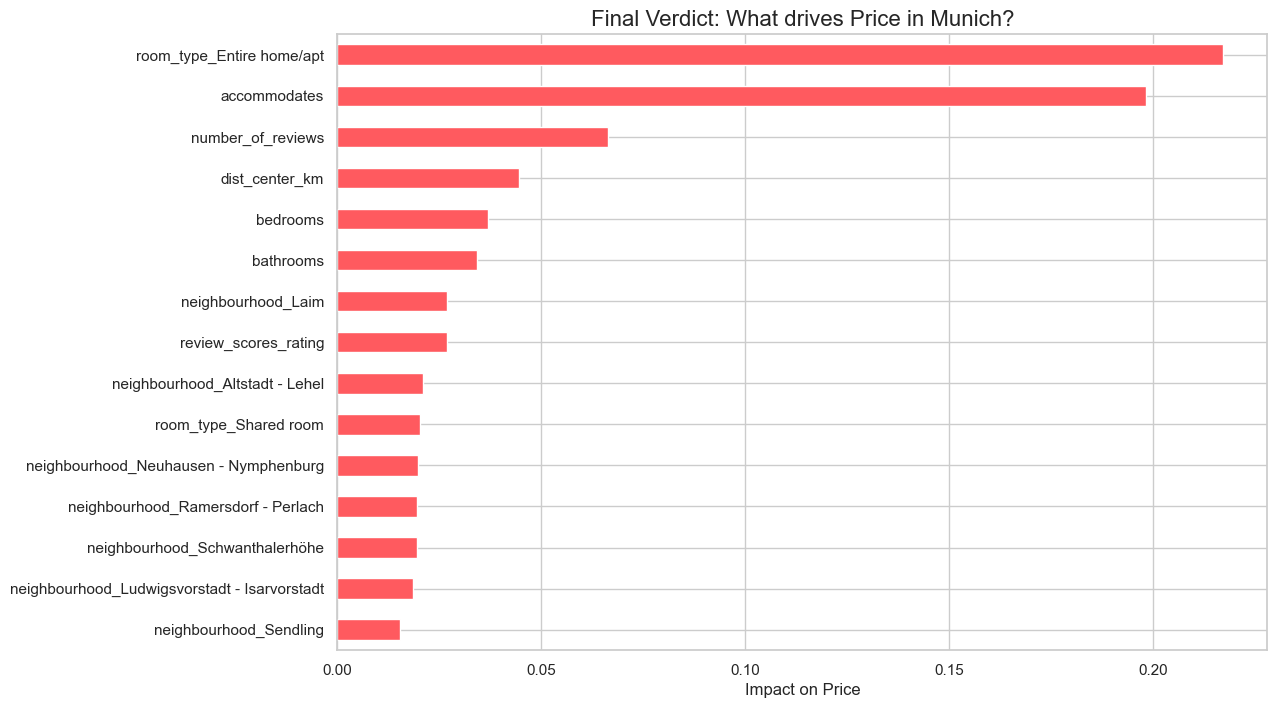

Final Model trained successfully.
Top 3 Drivers of Price: ['room_type_Entire home/apt', 'accommodates', 'number_of_reviews']


In [27]:
# --- FINAL STEP: VISUALIZING THE BEST MODEL ---

import matplotlib.pyplot as plt
import xgboost as xgb

# 1. Re-train the winner on the whole dataset
# We use the parameters found by your Grid Search:
# {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

# Define the model with the winning parameters
final_model = xgb.XGBRegressor(
    learning_rate=0.1, 
    max_depth=3, 
    n_estimators=100, 
    objective='reg:squarederror', 
    random_state=42
)

# We need to preprocess the whole X data first (Scaling/Encoding)
# fit_transform on the full dataset
X_processed = preprocessor.fit_transform(X)
# Get feature names back from the preprocessor
# (This is a bit tricky with OneHotEncoder, so we use a helper method)
def get_feature_names(column_transformer):
    feature_names = []
    # Loop through transformers
    for name, trans, column_names in column_transformer.transformers_:
        if name == 'num': # Numeric
            feature_names.extend(column_names)
        elif name == 'cat': # Categorical (OneHot)
            # Get the new column names created by OneHotEncoder
            new_names = trans.get_feature_names_out(column_names)
            feature_names.extend(new_names)
    return feature_names

feature_names = get_feature_names(preprocessor)

# Train final model
final_model.fit(X_processed, y)

# 2. Extract Feature Importance
importance_final = pd.Series(final_model.feature_importances_, index=feature_names)

# 3. Plot
plt.figure(figsize=(12, 8))
# Plot Top 15 features
importance_final.nlargest(15).sort_values().plot(kind='barh', color='#ff5a5f') # Airbnb Red color
plt.title('Final Verdict: What drives Price in Munich?', fontsize=16)
plt.xlabel('Impact on Price')
plt.show()

# 4. Final Diagnostics
print("Final Model trained successfully.")
print(f"Top 3 Drivers of Price: {importance_final.nlargest(3).index.tolist()}")